# EDA II

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Estadísticas-generales-del-dataset" data-toc-modified-id="Estadísticas-generales-del-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Estadísticas generales del dataset</a></span><ul class="toc-item"><li><span><a href="#Sidetable" data-toc-modified-id="Sidetable-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sidetable</a></span></li></ul></li><li><span><a href="#Valores-nulos" data-toc-modified-id="Valores-nulos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Valores nulos</a></span><ul class="toc-item"><li><span><a href="#Tipos-de-valores-nulos" data-toc-modified-id="Tipos-de-valores-nulos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tipos de valores nulos</a></span></li></ul></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Outliers</a></span><ul class="toc-item"><li><span><a href="#¿Qué-son?" data-toc-modified-id="¿Qué-son?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>¿Qué son?</a></span></li><li><span><a href="#¿Por-qué-es-importante-detectarlos?" data-toc-modified-id="¿Por-qué-es-importante-detectarlos?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>¿Por qué es importante detectarlos?</a></span></li><li><span><a href="#¿Cómo-detectamos-los-outliers?" data-toc-modified-id="¿Cómo-detectamos-los-outliers?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>¿Cómo detectamos los <em>outliers</em>?</a></span><ul class="toc-item"><li><span><a href="#Boxplot" data-toc-modified-id="Boxplot-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Boxplot</a></span></li><li><span><a href="#Desviación-estándar" data-toc-modified-id="Desviación-estándar-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Desviación estándar</a></span></li></ul></li></ul></li></ul></div>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable # si os da un error este comando es por no tenerlo instalado, 
                 # vemos cómo instalarlo en el siguiente apartado

# establecer el tamaño de nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

In [6]:
df = pd.read_csv("Datos/students.csv", index_col = 0)

In [7]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,NaN


Antes de empezar vamos a unificar el nombre de las columnas, quitando los espacios. 

In [8]:
nuevas_columnas = {col: col.replace(" ", "_") for col in df.columns}
df.rename(columns = nuevas_columnas, inplace = True)

In [9]:
df.head(1)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0


## Estadísticas generales del *dataset* 

### Sidetable

Se trata de una librería que nos va a construir de una forma muy sencilla una tabla de frecuencias y un resumen simple de los valores nulos de un *DataFrame*. 

`Sidetable` es una súper versión de pandas `value_counts` con un poco de `crosstab` mezclado. 

Lo primero que tenemos que hacer es instalarnos la librería usando pip:

```console
    pip install sidetable

    pip3 install sidetable
```

Después nos tendremos que importar la librería:

```python
    import sidetable
```

Tenemos dos métodos principales dentro de esta librería:

- `.freq()` 📌 Solo lo podremos usar para variables categóricas. 
- `.missing()`

1️⃣ `.freq()`: nos da información sobre la frecuencia de ocurrencia de cada categoría dentro de nuestras variables categóricas. 

In [116]:
df.stb.freq(["parental_level_of_education"])

,parental_level_of_education,count,percent,cumulative_count,cumulative_percent
0,associate's degree,201,22.333333,201,22.333333
1,some college,200,22.222222,401,44.555556
2,high school,176,19.555556,577,64.111111
3,some high school,162,18.000000,739,82.111111
4,bachelor's degree,108,12.000000,847,94.111111
5,master's degree,53,5.888889,900,100.000000


Como podemos ver, se muestran los valores de recuento y de porcentaje para la variable `parental_level_of_education`. 

Es decir, esta tabla nos está mostrando que la categoría `associate's degree` de la columna `parental_level_of_education` tiene 201 entradas en nuestro *DataFrame*, siendo un 22.33% de los datos. Además, también se proporcionan valores acumulativos. Por ejemplo, los 3 primeros niveles de estudios constituyen el 64.11% de todo el conjunto de datos.

En algunos casos, nos podemos encontrar con una columna categórica que tenga muchas categorías diferentes que dificultan la visualización de todas ellas. En este caso podemos usar parámetro `thresh` que nos va a permitir limitar los valores mostrados basándose en un valor de umbral sobre el porcentaje acumulado. Por ejemplo, podemos mostrar los niveles de educación que contienen el 65% de todos los estudiantes.

In [10]:
df.stb.freq(['parental_level_of_education'], thresh=65)

,parental_level_of_education,count,percent,cumulative_count,cumulative_percent
0,associate's degree,201,22.333333,201,22.333333
1,some college,200,22.222222,401,44.555556
2,high school,176,19.555556,577,64.111111
3,others,323,35.888889,900,100.000000


Los 3 primeros niveles de educación constituyen el 64.1% de todo el conjunto de datos. Las restantes se agrupan bajo la etiqueta "otros". Podemos cambiar esta etiqueta utilizando el parámetro `other_label`.

In [11]:
df.stb.freq(['parental_level_of_education'], thresh=65, other_label="other studies")

,parental_level_of_education,count,percent,cumulative_count,cumulative_percent
0,associate's degree,201,22.333333,201,22.333333
1,some college,200,22.222222,401,44.555556
2,high school,176,19.555556,577,64.111111
3,other studies,323,35.888889,900,100.000000


Hasta ahora, hemos evaluado la distribución de los datos según las categorías en una columna. *Sidetable* permite combinar varias columnas y comprobar categorías más específicas. Por ejemplo, las combinaciones más comunes de `parental_level_of_education` y `gender` pueden comprobarse con sidetable.

In [12]:
df.stb.freq(["parental_level_of_education", 'gender'])

,parental_level_of_education,gender,count,percent,cumulative_count,cumulative_percent
0,associate's degree,female,96,11.925466,96,11.925466
1,some college,female,93,11.552795,189,23.478261
2,associate's degree,male,86,10.683230,275,34.161491
3,high school,male,85,10.559006,360,44.720497
4,some college,male,81,10.062112,441,54.782609
5,high school,female,78,9.689441,519,64.472050
6,some high school,female,74,9.192547,593,73.664596
7,some high school,male,68,8.447205,661,82.111801
8,bachelor's degree,female,52,6.459627,713,88.571429
9,bachelor's degree,male,44,5.465839,757,94.037267


Esta tabla nos esta dicendo que el 11.92% de nuestros datos son mujeres con un nivel de estudios de "associate's degree", es decir es el nivel de estudios más común en mujeres. 

Si nos fijamos el sidetable nos devuelve por defecto el conteo para cada categoría o grupos de categorías. Sin embargo, podríamos estar interesados en alguna otra medida. Por ejemplo, en nuestro caso, podemos necesitar ordenar los niveles de estudios según el `math_score`. Se puede conseguir fácilmente utilizando el parámetro `value`. Sólo tenemos que pasar el nombre de la columna al parámetro value.



In [120]:
df.stb.freq(["parental_level_of_education"], value = 'math_score')

,parental_level_of_education,math_score,percent,cumulative_math_score,cumulative_percent
0,associate's degree,13507.0,22.872286,13507.0,22.872286
1,some college,13435.0,22.750364,26942.0,45.622650
2,high school,11029.0,18.676127,37971.0,64.298777
3,some high school,10069.0,17.050496,48040.0,81.349274
4,bachelor's degree,7249.0,12.275206,55289.0,93.624479
5,master's degree,3765.0,6.375521,59054.0,100.000000


La nota global del grupo `associate's degree` es 13507 mientras que la del grupo `master's degree` es 3765. 

2️⃣ `.missing()`: nos va a devolver información sobre cuántos datos nulos tenemos, y el porcentaje sobre el total para cada una de nuestras columnas. 

In [13]:
df.stb.missing(["parental_level_of_education"])

,missing,total,percent
gender,100,1000,10.0
parental_level_of_education,100,1000,10.0
writing_score,40,1000,4.0
math_score,10,1000,1.0
reading_score,1,1000,0.1


In [14]:
df.stb.missing()

,missing,total,percent
gender,100,1000,10.0
parental_level_of_education,100,1000,10.0
writing_score,40,1000,4.0
math_score,10,1000,1.0
reading_score,1,1000,0.1
race/ethnicity,0,1000,0.0
lunch,0,1000,0.0
test_preparation_course,0,1000,0.0


## Valores nulos 

### Tipos de valores nulos

- `np.nan`: En Python, NumPy NAN significa "*not a number*" y se usa para declarar los valores numéricos que faltan en una matriz. Como NumPy se utiliza para hacer frente a las matrices en Python, este valor puede ser creado utilizando `np.nan`. 

- `None`: la palabra clave `None` se utiliza para definir un valor nulo, o ningún valor. None **no** es lo mismo que `0`, `False`, o una cadena vacía. None es un tipo de datos propio (`NoneType`). 

    > La distinción entre `None` y `NaN` en Pandas es sutil, pero os dejamos una pequeña nota para dejar las cosas más claras:
    >
    > `None` representa una entrada perdida, pero su tipo no es numérico. Esto significa que cualquier columna (*Serie*) que contenga un `None` no puede ser de tipo numérico (por ejemplo, int y float).
    >
    > `NaN`, que significa *not a number*, es un tipo numérico. Esto significa que NaN puede aparecer en columnas de tipo int y float.

- `NaT`: los veremos cuando tengamos valores nulos en columnas de tipo `datetime`.

- `valores texto`: a veces nos podemos encontrar con valores de tipo texto pero que no son valores reales, si no que nos indican que no hay valor. Algunos ejemplos de esto son: 
   
    -  `"n/a"`, `"NaN"`, `"nan"`, `"null"`: son NaN que serán literalmente *strings*. Esto puede ocurrir cuando se han metido en nuestra base de datos literalmente con esa estructura. Aún con todo, podemos vernos en dos situaciones: 
  
        - Pandas es bastante listo y cuando va a leer nuestro `csv` los suele castear a `np.nan`.
        
        - En caso de que no lo haga, podemos usar el parámetro `na_values` del método read_csv que nos permite especificar cómo esta codificado nuestro valor nulo: 

            ```python
               df=pd.read_csv('Yourfile.csv',na_values=['n/a']).fillna(np.nan) # en el caso de que el nulo este como "n/a"
            # pero ojo! esto solo nos será útil si todos nuestros nulos están codificados así. 
            ```

         - Reemplazar esos valores nulos en formato *string* con el método `replace` de Pandas como hemos aprendido anteriormente. 
  
  - los `99999` o `00000`: es similar al caso anterior, pero en este caso vienen codificados como *integers*. Esto es usual encontrarlo en datos que vienen de sensores o sistemas de medición continua. En caso de que queramos reemplazarlos por nulos tendremos que usar el método replace de Pandas.

      ```python
       df.replace(99999, np.nan, inplace=True)
      ```` 
      

## Outliers

### ¿Qué son?

Los *outliers* o valores perdidos son observaciones anormales en nuestros datos que puede afectar potencialmente nuestros análisis. 

> Es decir, un *outlier* es una observación dentro de nuestros datos que no es consistente con el resto, que se escapa. 

Imaginemos que estamos midiendo el peso de las alumnas de una clase y son los siguientes:

```python
    pesos = [92.31, 76.4, 87.3, 60.86, 65.96, 74.23, 87.56, 82.47, 69.27, 81.69]
```

Vemos que
- el peso máximo es de 92.31,
- el peso mínimo es de 60.86,
- la media del peso de la clase sería 77.085,
- la distancia del máximo y del mínimo a la media es de 14.504 y 16.94 respectivamente. 

**Como vemos la media se sitúa en la mitad del intervalo y nos podría dar una muy buena estimación del peso de la clase** 

Imaginemos ahora que los pesos de las 10 alumnas son: 

```python
    pesos2 = [92.31, 76.4, 117.3, 60.86, 65.96, 74.23, 87.56, 82.47, 69.27, 81.69]
```

En este caso: 

- el peso máximo es de 117.3,
- el peso mínimo es de 60.86,
- la media del peso de la clase sería 80.805,
- la distancia del máximo y del mínimo a la media es de 36.49 y 19.94 respectivamente. 

**En este caso la media ya no está situada aproximadamente en la mitad del intervalo**. El efecto de la alumna que tiene un mayor peso hizo que la media aritmética se haya desplazado hacia el valor máximo y por lo tanto ya no es tan buena representación de como se reparten los pesos en la clase.


### ¿Por qué es importante detectarlos?  

Ya sabemos que un dato atípico es un dato extremo o que difiere significativamente de los demás, pero **¿por qué son importantes?**

Una de las razones principales es que muchos estadísticos se ven afectados por la presencia de estos valores. Con la presencia de un *outlier* los resultados de nuestras conclusiones podrían ser poco fiables. 

Pero entonces, ¿qué hacemos con los valores atípicos? 

De la misma forma que para hacer un análisis exploratorio de los datos no existe una receta universal, en el caso de los *outliers* tampoco existe 😢. Veamos algunos supuestos de cómo trabajar con los *outliers*

- Hay que tener en cuenta que no todos los valores atípicos son iguales. Algunos tienen una fuerte influencia, otros no. Algunos son valores de datos válidos e importantes. Algunos son simplemente errores o ruido.

Por lo tanto, no se podría dar ninguna recomendación, sino que deberíamos tomarnos un tiempo para averiguar algunas cosas:

- ¿Por qué queremos encontrar los valores atípicos? Es posible que queramos ver el valor atípico porque estamos interesados en la anormalidad. Debemos pensar en cuál es nuestra pregunta. 

- ¿El valor atípico está causando "realmente" algún problema en el resultado?

- ¿De dónde procede el valor atípico? Esto puede requerir un análisis en profundidad de los datos. Además, no siempre se puede saber de dónde procede, pero debemos intentar considerar diferentes posibilidades porque puede ayudar a informar sobre la mejor manera de proceder.


### ¿Cómo detectamos los *outliers*?

Tenemos 2 posibles formas de detectar *outliers*.

- Visualmente usando el Boxplot.

- Usando la desviación estándar.


#### Boxplot 

Los *boxplot* son una representación gráfica de datos numéricos a través de sus cuantiles. Es una forma muy sencilla pero eficaz de visualizar los valores atípicos. 

Cualquier punto de datos que se muestre por encima o por debajo de los bigotes, puede ser considerado un valor atípico. Veamos como hacerlo para nuestros datos: 

In [15]:
# lo primero, sacamos las variables numéricas

numericas = df.select_dtypes(include = np.number)

numericas.head(2)

,math_score,reading_score,writing_score
0,72.0,72.0,74.0
1,69.0,90.0,NaN


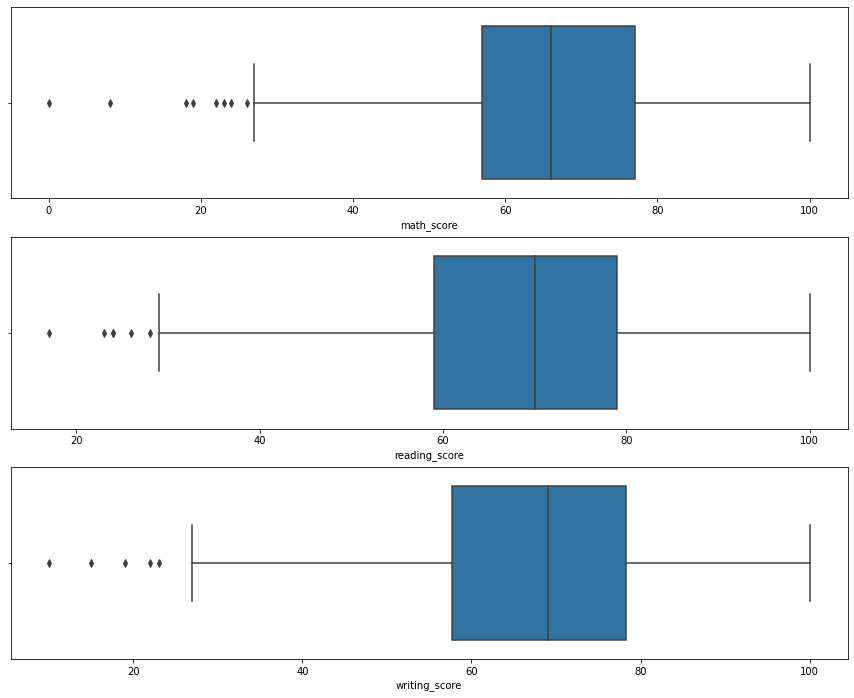

In [124]:
fig, axes = plt.subplots(3, 1, figsize=(15,12))

for i in range(len(numericas.columns)):
    sns.boxplot(x = numericas.columns[i], data = df, ax=axes[i]); # para trazar una línea de densidad

plt.show()

#### Interpretemos los resultados

En el caso de la primera figura que corresponde con `math_score` podemos ver como: 

- La mediana, representada por la línea dentro del "cajoncito" es de alrededor de 65. Es decir, el 50% de nuestros datos están en por debajo de este valor. 

- En cuanto al los "límites" del cajón: 

    - El de la izquierda nos indica el percentil 25% (Q1). En este caso el valor está alrededor de 57. Lo que significa que el 25% de las clasificaciones están por debajo de 57. 
    
    - El de la derecha nos indica el percentil 75% (Q2), en este caso el valor es aproximadamente 77. Es decir, el 75% de los estudiantes tienen una calificación menor que 77. O lo que es lo mismo, el 25% de los estudiantes tienen una nota superior a 77.
    
- Los "bigotes" de la gráfica nos van a mostrar:
    - El mínimo que es lo mismo que `Q1 - 1.5*IQR`
    - El máximo que es lo mismo que `Q3 + 1.5*IQR`
    
    `IQR` es el rango intercuartílico. Aunque ahora no lo entendamos, don't panic! En la siguiente lección de Limpieza e Imputación lo veremos más en detalle 🙂!

- Los puntos que salen de los "bigotes" son todos aquellos puntos que consideraremos *outliers*.


#### Desviación estándar

Otra forma de detectar valores átipicos es usando la desviación estándar. En estadística, si una distribución de datos es aproximadamente normal, alrededor del 68% de los valores de los datos se encuentran dentro de una desviación estándar de la media,  alrededor del 95% están dentro de dos desviaciones estándar, y alrededor del 99,7% se encuentran dentro de tres desviaciones estándar.

![image.png](https://github.com/Adalab/data_imagenes/blob/main/Modulo-2/EDA/desviacion.png?raw=true)
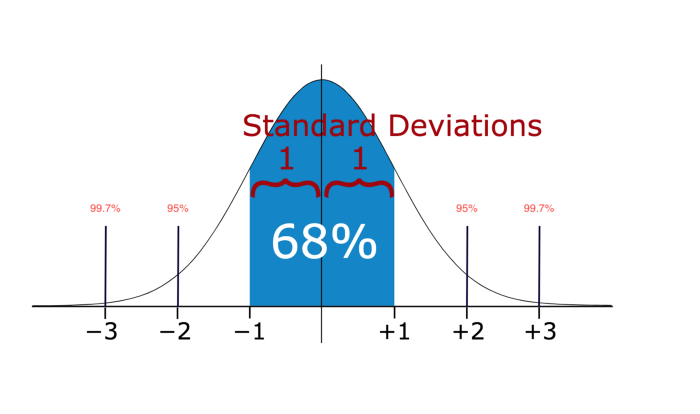

Por lo tanto, si hay algún valor que se salga de esas 3 veces la desviación estándar, es muy probable que esos puntos sean anómalos o atípicos.

Veamos como lo podemos ver visualmente. Para eso tenemos que calcular los intervalos de confianza al 99.7%. Si bien la matemática que hay detrás de este gráfico no lo tenéis que entender, os dejamos [aquí](https://rpubs.com/acatania/396921) algo de documentación por si queréis "curiosear" un poco. 

In [16]:
# lo primero que hacemos es calcular la  media y la desviación estándar para una columna, por ejemplo "math_score"

media = df.math_score.mean()
desviacion = df.math_score.std()

Una vez calculada la media y la desviación debemos calcular ese primer umbral de la distribución, aquel donde están el 68% de nuestros datos. Es decir, deberíamos coger el valor de la media y sumarle la desviación estándar para sacar el límite superior y restarla para sacar el límite inferior 👇🏽.

In [18]:
upper = media + desviacion
lower = media - desviacion

Lo siguiente que tenemos que hacer es sacar los valores de tres desviaciones estándar para calcular los límites de los valores que consideramos *outliers*. Valores más altos que estos serán *outliers*. 

In [19]:

lcb = media - desviacion * 3
ucb = media + desviacion * 3

In [128]:
df.head(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,NaN


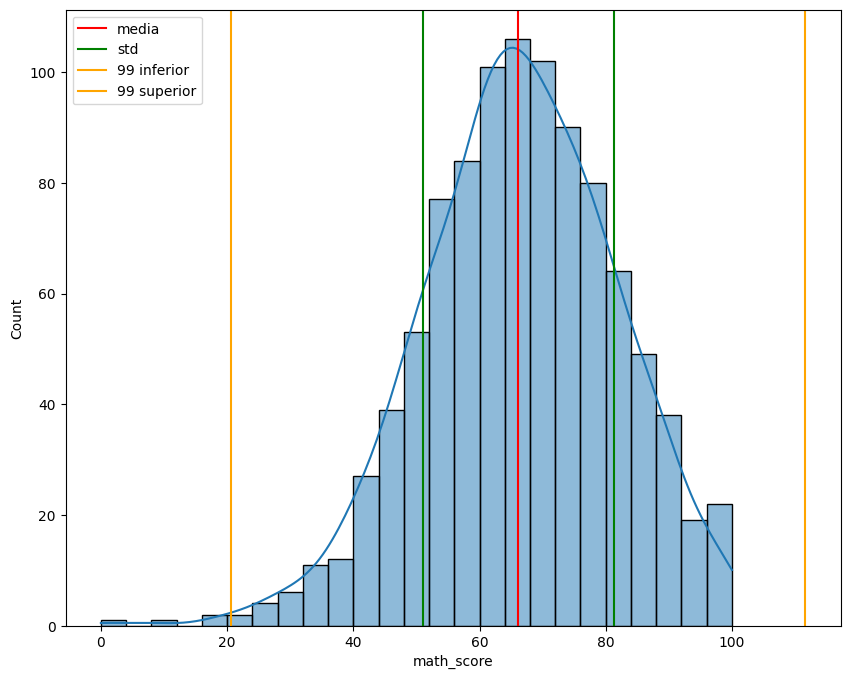

In [20]:
# iniciamos el gráfico
graf = sns.histplot(x=df.math_score, kde=True) # Hemos guardado el gráfico como una variable

graf.axvline(x=media, c="red", label="media")

# plotemos la desviación estándar
graf.axvline(x=upper, c="green", label="std")
graf.axvline(x=lower, c="green")

#ploteamos el intervalo de confianza al 99.7%
graf.axvline(x=lcb, c="orange", label="99 inferior") 
graf.axvline(x=ucb, c="orange", label="99 superior")

plt.legend()

Si interpretamos estos resultados:

- La línea roja nos muestra la media de las notas de matemáticas de los alumnos.
- Las líneas verdes muestran la desviación estándar de nuestro datos. 
- Por último, todos aquellos puntos que estén fuera de las líneas amarillas serán *outliers*.

📌 **En la siguiente lección, limpieza e imputación veremos como con unas pocas lineas de código podemos hacer una buena gestión de estos valores.**

## EJERCICIOS

1️⃣ Haz una descripción estadística de nuestro DataFrame usando sidetable sobre las columnas `type` y `listed_in`.

- ¿Qué tipo de títulos es más común en nuestro DataFrame?
- Cuando filtres por `listed_in`, devuelve solo las que formen el 70% de los datos.
- Agrupa por `listed_in` y `type` sacando únicamente los datos que compongan el 40% de los datos.
- ¿Qué porcentaje de nulos tenemos?

> 📌Después de sacar los resultados, debate con tu compañera la interpretación de los resultados obtenidos.


In [21]:
netflix = pd.read_csv("Datos/netflix_titles.csv", index_col = 0)

In [22]:
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [23]:
netflix.stb.freq(['type']) #Más comunes las peliculas

,type,count,percent,cumulative_count,cumulative_percent
0,Movie,4265,68.415143,4265,68.415143
1,TV Show,1969,31.584857,6234,100.000000


In [26]:
netflix.stb.freq(['listed_in'], thresh = 70)

,listed_in,count,percent,cumulative_count,cumulative_percent
0,Documentaries,299,4.796278,299,4.796278
1,Stand-Up Comedy,273,4.379211,572,9.175489
2,"Dramas, International Movies",248,3.978184,820,13.153673
3,"Dramas, Independent Movies, International Movies",186,2.983638,1006,16.137312
4,"Comedies, Dramas, International Movies",174,2.791145,1180,18.928457
5,Kids' TV,159,2.550529,1339,21.478986
6,"Documentaries, International Movies",150,2.406160,1489,23.885146
7,"Children & Family Movies, Comedies",129,2.069297,1618,25.954443
8,"Comedies, International Movies",120,1.924928,1738,27.879371
9,Children & Family Movies,120,1.924928,1858,29.804299


In [27]:
netflix.stb.freq(['listed_in', 'type'], thresh = 40)

,listed_in,type,count,percent,cumulative_count,cumulative_percent
0,Documentaries,Movie,299,4.796278,299,4.796278
1,Stand-Up Comedy,Movie,273,4.379211,572,9.175489
2,"Dramas, International Movies",Movie,248,3.978184,820,13.153673
3,"Dramas, Independent Movies, International Movies",Movie,186,2.983638,1006,16.137312
4,"Comedies, Dramas, International Movies",Movie,174,2.791145,1180,18.928457
5,Kids' TV,TV Show,159,2.550529,1339,21.478986
6,"Documentaries, International Movies",Movie,150,2.406160,1489,23.885146
7,"Children & Family Movies, Comedies",Movie,129,2.069297,1618,25.954443
8,"Comedies, International Movies",Movie,120,1.924928,1738,27.879371
9,Children & Family Movies,Movie,120,1.924928,1858,29.804299


In [29]:
netflix.stb.missing(['type'])

,missing,total,percent
director,1969,6234,31.584857
cast,570,6234,9.143407
country,476,6234,7.635547
date_added,11,6234,0.176452
rating,10,6234,0.160411


In [30]:
netflix.stb.missing(['listed_in'])

,missing,total,percent
director,1969,6234,31.584857
cast,570,6234,9.143407
country,476,6234,7.635547
date_added,11,6234,0.176452
rating,10,6234,0.160411
